In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
test_1 = pd.read_excel("JHU-UIUC data analysis/data/PDMotion_0001_Test.xlsx", sheet_name = None)
test_1

{'ACL':       Relative Time       Date Time Stamp UTC      Volt    Volt.1    Volt.2  \
 0            0.0000 2016-12-06       20:17:27  1.622314  1.815186  1.525879   
 1            0.0125 2016-12-06       20:17:27  1.619873  1.815186  1.527100   
 2            0.0250 2016-12-06       20:17:27  1.621094  1.817627  1.525879   
 3            0.0375 2016-12-06       20:17:27  1.623535  1.813965  1.524658   
 4            0.0500 2016-12-06       20:17:27  1.621094  1.817627  1.523438   
 ...             ...        ...            ...       ...       ...       ...   
 3381        42.2625 2016-12-06       20:18:10  1.547852  1.820068  1.583252   
 3382        42.2750 2016-12-06       20:18:10  1.546631  1.818848  1.583252   
 3383        42.2875 2016-12-06       20:18:10  1.545410  1.818848  1.584473   
 3384        42.3000 2016-12-06       20:18:10  1.545410  1.816406  1.583252   
 3385        42.3125 2016-12-06       20:18:11  1.546631  1.818848  1.584473   
 
         Volt.3    Volt.4    Vo

In [62]:
#sheet_names = ["PS", "HM", "FT", "TT", "LA"] 
table = "HM"
ft1 = test_1[table]
ft1



,Relative Time,Date,Time Stamp UTC,Volt,Volt.1,Volt.2,Volt.3,Volt.4,Volt.5,Volt.6,Volt.7,Volt.8,Volt.9,Volt.10,Volt.11,Chn 1 Events
0,0.0000,2016-12-06,19:45:44,1.734619,1.771240,1.552734,1.840820,1.628418,1.573486,1.701660,1.789551,1.491699,1.887207,1.651611,1.424561,NaN
1,0.0125,2016-12-06,19:45:44,1.733398,1.771240,1.555176,1.840820,1.627197,1.569824,1.704102,1.791992,1.494141,1.887207,1.651611,1.427002,NaN
2,0.0250,2016-12-06,19:45:44,1.727295,1.770020,1.556396,1.839600,1.628418,1.572266,1.699219,1.790771,1.494141,1.889648,1.652832,1.428223,NaN
3,0.0375,2016-12-06,19:45:44,1.729736,1.771240,1.557617,1.839600,1.627197,1.572266,1.702881,1.790771,1.491699,1.887207,1.651611,1.428223,NaN
4,0.0500,2016-12-06,19:45:44,1.729736,1.771240,1.555176,1.838379,1.625977,1.573486,1.700439,1.791992,1.491699,1.888428,1.651611,1.427002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,38.1750,2016-12-06,19:46:23,1.701660,1.743164,1.568604,1.843262,1.618652,1.588135,1.759033,1.767578,1.491699,1.901855,1.641846,1.446533,NaN
3055,38.1875,2016-12-06,19:46:23,1.718750,1.751709,1.547852,1.844482,1.612549,1.580811,1.759033,1.771240,1.492920,1.901855,1.639404,1.447754,NaN
3056,38.2000,2016-12-06,19:46:23,1.727295,1.761475,1.560059,1.843262,1.612549,1.574707,1.759033,1.770020,1.491699,1.901855,1.641846,1.447754,NaN
3057,38.2125,2016-12-06,19:46:23,1.739502,1.787109,1.589355,1.851807,1.614990,1.571045,1.759033,1.766357,1.491699,1.903076,1.640625,1.447754,NaN


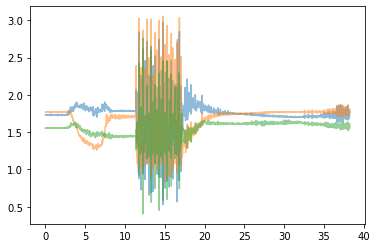

In [63]:
plt.plot(test_1[table]["Relative Time"], test_1[table]["Volt"], alpha=.5)
plt.plot(test_1[table]["Relative Time"], test_1[table]["Volt.1"], alpha=.5)
plt.plot(test_1[table]["Relative Time"], test_1[table]["Volt.2"], alpha=.5)

In [64]:
resultant = []
for i, r in ft1.iterrows():
    resultant.append(np.sqrt(r["Volt"]**2 + r["Volt.1"]**2 + r["Volt.2"]**2))

resultant[0:5]

[2.925265726425218,
 2.9258389944736867,
 2.9221373863520674,
 2.924970262327392,
 2.9236708849134696]

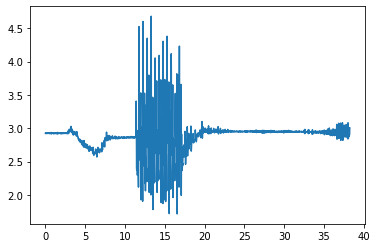

In [65]:
plt.plot(ft1["Relative Time"], resultant)

In [66]:
derivative = []
for i in range(1, len(resultant)):
    derivative.append((resultant[i] - resultant[i-1])/0.0125)
derivative[0:5]

[0.04586144387747737,
 -0.296128649729539,
 0.22663007802595558,
 -0.10395019311378206,
 0.11560604074180247]

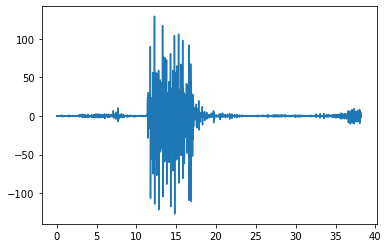

In [67]:
plt.plot(ft1["Relative Time"][1:], derivative)

In [68]:
abs_derivative = [abs(i) for i in derivative]
abs_derivative[0:5]

[0.04586144387747737,
 0.296128649729539,
 0.22663007802595558,
 0.10395019311378206,
 0.11560604074180247]

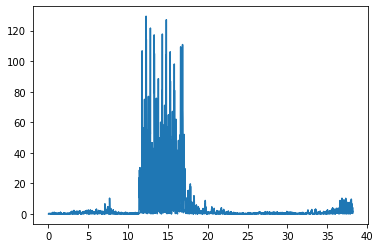

In [69]:
plt.plot(ft1["Relative Time"][1:], abs_derivative)

In [70]:
n = 8
rms = ((((pd.DataFrame(np.array(abs_derivative))**2).rolling(n).mean()) **0.5)[0].to_numpy().tolist()[n-1:])
rms[0:5]

[0.2436887343408723,
 0.2631274960636652,
 0.24457328238252485,
 0.2333662036221853,
 0.23412939888843418]

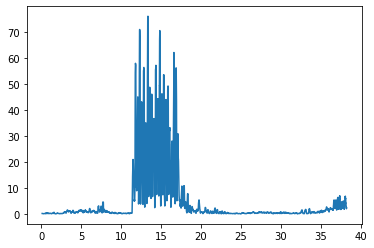

In [71]:
plt.plot(ft1["Relative Time"][8:], rms)

In [72]:
max_v = max(rms)
min_v = min(rms)
max_normalize = [(i - min_v)/(max_v-min_v) for i in rms]
max_normalize[0:5]

[0.0023652602771167324,
 0.002621225764517056,
 0.002376907817934372,
 0.0022293353841480925,
 0.0022393849773831363]

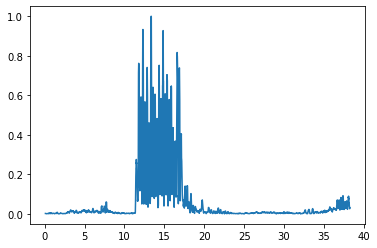

In [73]:
plt.plot(ft1["Relative Time"][8:], max_normalize)

In [74]:
threshold_val = 0.2
threshold = [1 if i > threshold_val else 0 for i in max_normalize]
threshold[0:5]

[0, 0, 0, 0, 0]

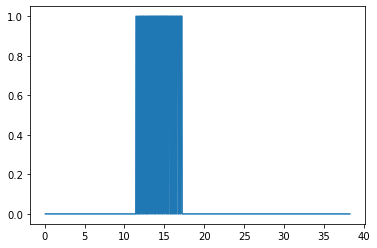

In [75]:
plt.plot(ft1["Relative Time"][8:], threshold)

In [76]:
#Without RMS
max_v = max(abs_derivative)
min_v = min(abs_derivative)
max_normalize_nrms = [(i - min_v)/(max_v-min_v) for i in abs_derivative]
max_normalize_nrms[0:5]

[0.0003544220374035121,
 0.002288513193153902,
 0.0017514209584300223,
 0.000803337970132433,
 0.0008934155803146252]

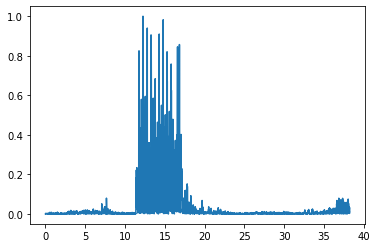

In [77]:
#Without RMS
plt.plot(ft1["Relative Time"][1:], max_normalize_nrms)

In [78]:
#Without RMS
threshold_val = 0.2
threshold_nrms = [1 if i > threshold_val else 0 for i in max_normalize_nrms]
threshold_nrms[0:5]

[0, 0, 0, 0, 0]

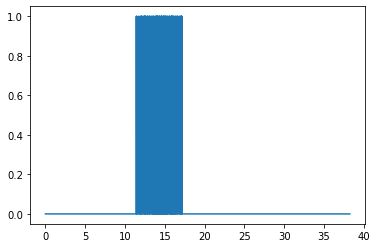

In [79]:
#Without RMS
plt.plot(ft1["Relative Time"][1:], threshold_nrms)